In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

import scipy.io
import seaborn as sns; sns.set()

from sklearn.mixture import GaussianMixture

from sklearn import metrics

In [54]:
#参考博客：https://www.douban.com/group/topic/104748979/

In [ ]:
#1、数据集导入

In [55]:
data1 = scipy.io.loadmat('C:\\Users\\Tianh\\Desktop\\DMLab\\data\\face\\ORL_32x32.mat')
df2 =pd.read_csv('C:\\Users\\Tianh\\Desktop\\DMLab\\data\\wineequality\\winequality-white.csv',delimiter=';')
df3 =pd.read_csv('C:\\Users\\Tianh\\Desktop\\DMLab\\data\\wineequality\\winequality-red.csv',delimiter=';')
data4 = scipy.io.loadmat('C:\\Users\\Tianh\\Desktop\\DMLab\\data\\face\\Yale_32x32.mat')
data5 = pd.read_csv(r"C:\Users\\Tianh\Desktop\DMLab\data\Iris\iris_data.csv",header = None)

In [ ]:
#2、数据集预处理得到数据集样本特征及标签

In [56]:
fea1 = data['fea'].astype(np.float64)
fea1 = data['fea'].astype(np.float64)
true_label1= data['gnd'].ravel()

fea2 = df2.drop('quality',axis=1)
fea2 = np.array(fea2)
true_label2 = df2['quality']
true_label2 = np.array(true_label2)

fea3 = df3.drop('quality',axis=1)
fea3 = np.array(fea3)
true_label3 = df3['quality']
true_label3 = np.array(true_label3)

fea4 = data4['fea'].astype(np.float64)
true_label4= data4['gnd'].ravel()

fea5 = np.array(data5.iloc[:,0:4])
true_label5 = data5[4]

In [ ]:
#3、高斯聚类

In [90]:
gmm = GaussianMixture(n_components=4).fit(fea5)
predict_label = gmm.predict(fea5)
plt.scatter(fea5[:, 0], fea5[:, 1], c=predict_label, s=40, cmap='viridis');
plt.scatter(fea2[:, 0], fea2[:, 1])

In [ ]:
#4、聚类结果分析1 观察每一个样本点的分类概率

In [100]:
probs = gmm.predict_proba(fea5)
print(probs[:5].round(3))
# 计算每一个样本点的分类概率

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
# 聚类结果分析1可视化

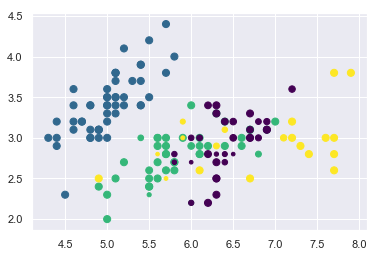

In [102]:
size = 50 * probs.max(1) ** 2  # 由圆点面积反应概率值的差异
plt.scatter(fea5[:, 0], fea5[:, 1], c=predict_label, cmap='viridis', s=size);

In [ ]:
#5、聚类结果分析2 评价

In [93]:
true_label= true_label5

In [94]:
#Mutual Information based scores 互信息
x1 = metrics.adjusted_mutual_info_score(true_label,predict_label)

# Homogeneity 同质性 每个群集只包含单个类的成员
x2 = metrics.homogeneity_score(true_label, predict_label)

# completeness 完整性 类的所有成员都分配给同一个群集
x3 = metrics.completeness_score(true_label, predict_label)

# 两者的调和平均V-measure：
x4 = metrics.v_measure_score(true_label, predict_label)

#  Fowlkes-Mallows scores
# The Fowlkes-Mallows score FMI is defined as the geometric mean 
# of the pairwise precision and recall:
x5 = metrics.fowlkes_mallows_score(true_label,predict_label)

# Silhouette Coefficient 轮廓系数
# x6 = metrics.silhouette_score(fea1, predict_label, metric='euclidean')

# Calinski-Harabaz Index 分数值ss越大则聚类效果越好
# 类别内部数据的协方差越小越好，
# 类别之间的协方差越大越好，这样的Calinski-Harabasz分数会高。
# x7 = metrics.calinski_harabaz_score(fea1, predict_label)

D:\Users\Tianh\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [ ]:
#6、评价结果导出为csv文件

In [95]:
rows = [['Mutual Information based scores',x1]
       ,['Homogeneity',x2]
       ,['completeness',x3]
       ,['V-measure',x4]
       ,['Fowlkes-Mallows scores',x5]
#         ['Silhouette Coefficient',x6]
#         ['Calinski-Harabaz Index',x7]
       ]

In [96]:
with open(r"C:\Users\Tianh\Desktop\ans5.csv",  'w' , newline='') as csv_file:
     # 获取一个csv对象进行内容写入
    writer=csv.writer(csv_file)
    for row in rows:
        # writerow 写入一行数据
        writer.writerow(row)
    # 写入多行
    writer.writerows(rows)